In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import time
from datetime import datetime, timedelta
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from math import sqrt
import seaborn as sns; sns.set()
from technicalSignals import momentum,SMA,inBBands


In [2]:
tickers=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX']
TREND_WINDOWs = [(-48,0),(-35,0),(-28,0),(-7,0),(-1,0),(1,2),(1,8),(1,29),(1,36),(1,50)]
kind_of_dataset = 'affectivespace'

In [3]:
class DatasetManager:
    def __init__(self):
        X_raw = None
        Y_raw = None
        Y = None
        X = None
    
    def load_dataset(self, ticker, kind, technicalFeatures=False):
        types = {'summary': '/home/simone/Desktop/NLFF/intrinioDatasetUpdated/SentimentFullAggregatedHourly/',
            'affectivespace': '/home/simone/Desktop/NLFF/AffectiveSpace/Aggregated_AffectSummary_dataset/',
            'title': '/home/simone/Desktop/NLFF/intrinioDatasetUpdated/SentimentTitleAggregatedHourly/',
            'senticnet':''}
        news =  pd.read_csv(types[kind]+ticker+'.csv')
        price = pd.read_csv('/home/simone/Desktop/NLFF/indexes/indexes'+ticker+'.csv')
        price = price.rename(index=str, columns={"date": "DATE"})
        news = news.rename(index=str, columns={"initTime": "DATE"})
        news = news.drop(['Unnamed: 0'], axis=1)
        news['DATE'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in news['DATE']]
        # This datased is already GMT+0
        price['DATE'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['DATE']]
        if(technicalFeatures):
            price['mom_30'] = momentum(price, 30)
            price['mom_50'] = momentum(price, 50)
            price['mom_100'] = momentum(price, 100)
            price['mom_150'] = momentum(price, 150)
            price['SMA_30'] = SMA(price, 30)
            price['SMA_50'] = SMA(price, 50)
            price['SMA_100'] = SMA(price, 100)
            price['SMA_150'] = SMA(price, 150)
            price['in_BBands'] = inBBands(price)

        #ALLIGNMENT
        initDate = max(news['DATE'][0], datetime(2017, 5, 22, 0, 0, 0))
        finalDate = min(news['DATE'][len(news)-1],datetime(2018, 6, 21, 0, 0, 0))
        news.drop(news[news.DATE > finalDate].index, inplace=True)
        news.drop(news[news.DATE < initDate].index, inplace=True)
        news = news.reset_index(drop=True)
        price.drop(price[price.DATE > finalDate].index, inplace=True)
        price.drop(price[price.DATE < initDate].index, inplace=True)
        price = price.reset_index(drop=True)
        assert len(price) == len(news)
        # FEATURES
        sentiment = news.drop(['DATE'], axis=1)
        X = sentiment
        for window in [5,10,15,20,30,50]:
            temp = sentiment.rolling(window).mean()
            temp.columns = temp.columns +'_'+str(window)
            X = pd.concat([X, temp],axis=1)
        if(technicalFeatures):   
            technical_features = ['mom_30','mom_50','mom_100','mom_150','SMA_30','SMA_50','SMA_100','SMA_150','in_BBands']
            X = pd.concat([X, price[technical_features]],axis=1)

            
        #NORMALIZATION:
        min_max_scaler = preprocessing.MinMaxScaler()
        X = np.nan_to_num(np.asarray(X, dtype=float))
        X = np.asarray(min_max_scaler.fit_transform(X))
        self.X_raw = X
        self.Y_raw = price

    def get_dataset_for_trend(self, init, finish):
        y = list()
        x = list()
        price = self.Y_raw
        y = list()
        means = list()
        runningMean = 0
        for i in range(len(price['volume'])):
            runningMean +=price['volume'][i]
            means.append(runningMean/(i+1))
        for i in range(abs(init),len(price)-finish):
            s=np.sign(price['volume'][i+init:i+finish].mean() - means[i])
            y.append(0 if s==-1 else 1)
            x.append(self.X_raw[i])
        y = np.array(y)
        x = np.array(x)
        self.X = x
        self.Y = y
        return(x,y)







==================== AAPL ==================== 



trend:  -48   0
....................................................................................................trend:  -35   0
....................................................................................................trend:  -28   0
....................................................................................................trend:  -7   0
....................................................................................................trend:  -1   0
....................................................................................................trend:  1   2
....................................................................................................trend:  1   8
....................................................................................................trend:  1   29
....................................................................................................trend:  1   36
..........

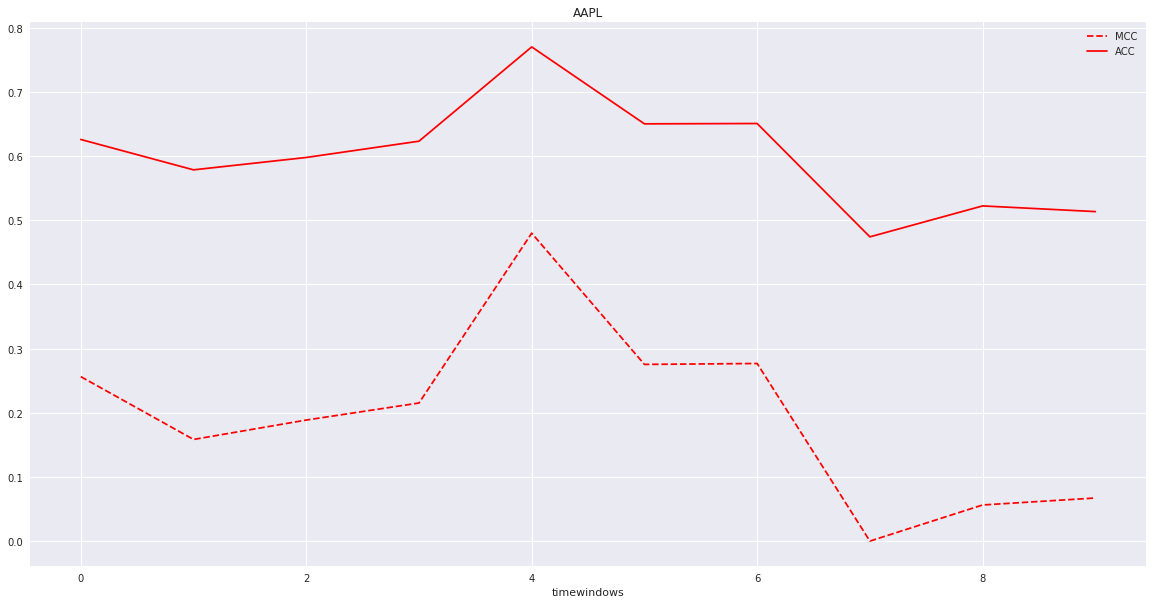




==================== AMZN ==================== 



trend:  -48   0
....................................................................................................trend:  -35   0
....................................................................................................trend:  -28   0
....................................................................................................trend:  -7   0
....................................................................................................trend:  -1   0
....................................................................................................trend:  1   2
....................................................................................................trend:  1   8
....................................................................................................trend:  1   29
....................................................................................................trend:  1   36
..........

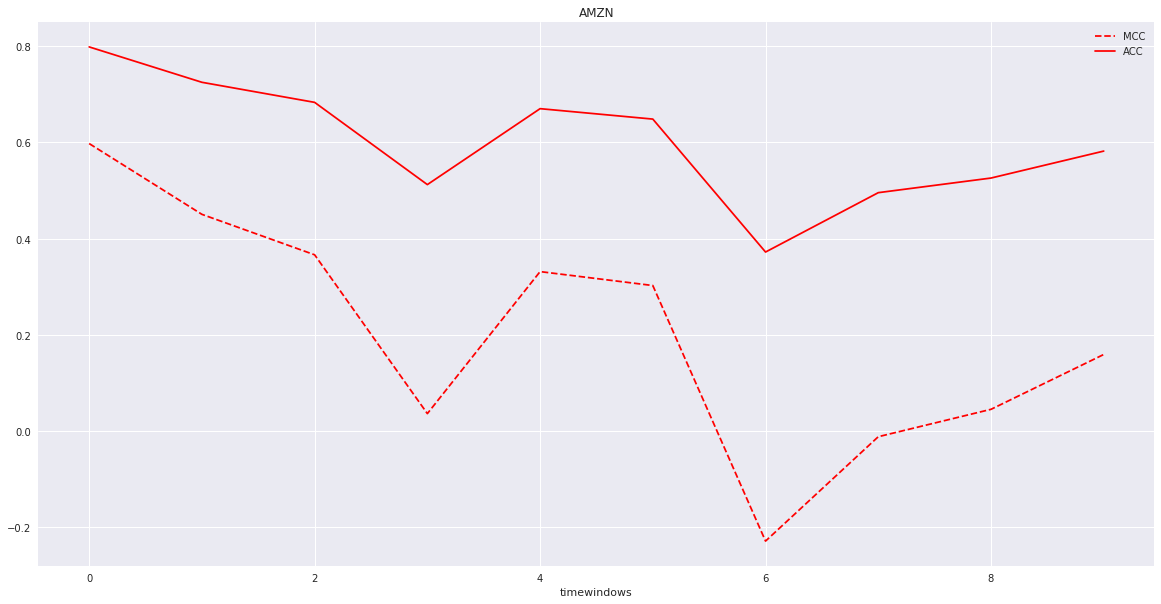




==================== GOOGL ==================== 



trend:  -48   0
....................................................................................................trend:  -35   0
....................................................................................................trend:  -28   0
....................................................................................................trend:  -7   0
....................................................................................................trend:  -1   0
....................................................................................................trend:  1   2
....................................................................................................trend:  1   8
....................................................................................................trend:  1   29
....................................................................................................trend:  1   36
.........

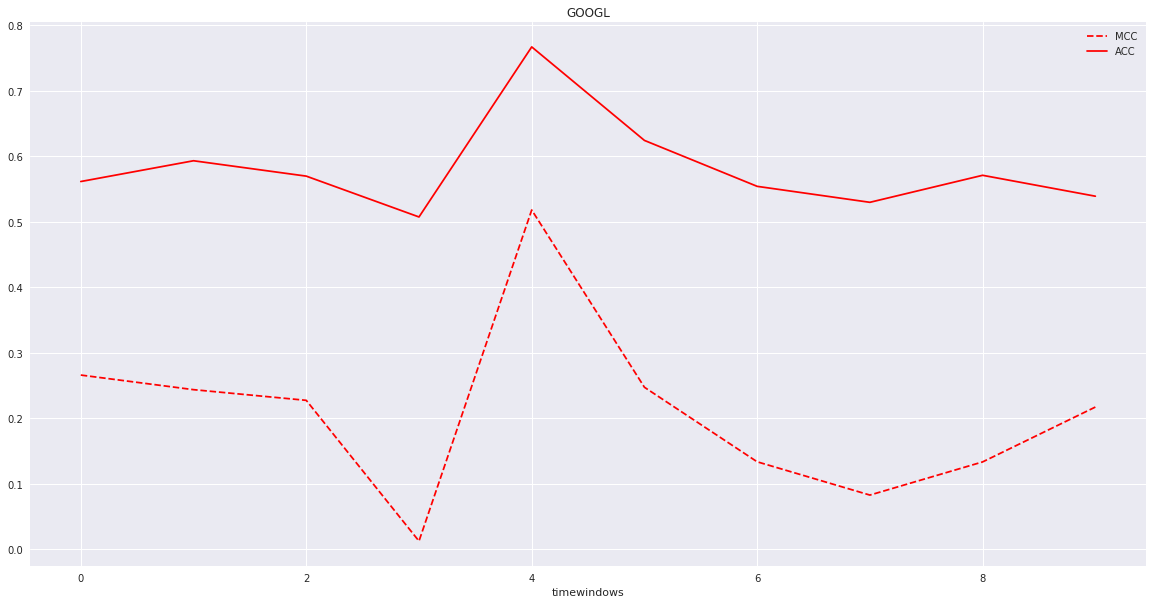




==================== MSFT ==================== 



trend:  -48   0
....................................................................................................trend:  -35   0
....................................................................................................trend:  -28   0
....................................................................................................trend:  -7   0
....................................................................................................trend:  -1   0
....................................................................................................trend:  1   2
....................................................................................................trend:  1   8
....................................................................................................trend:  1   29
....................................................................................................trend:  1   36
..........

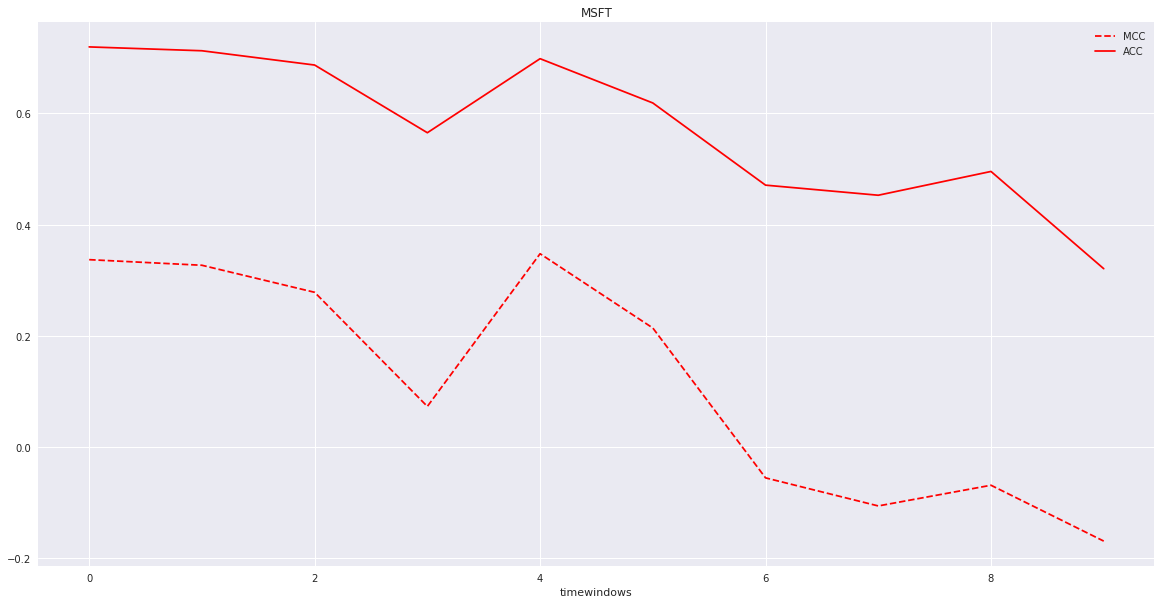




==================== FB ==================== 



trend:  -48   0
....................................................................................................trend:  -35   0
....................................................................................................trend:  -28   0
....................................................................................................trend:  -7   0
....................................................................................................trend:  -1   0
....................................................................................................trend:  1   2
....................................................................................................trend:  1   8
....................................................................................................trend:  1   29
....................................................................................................trend:  1   36
............

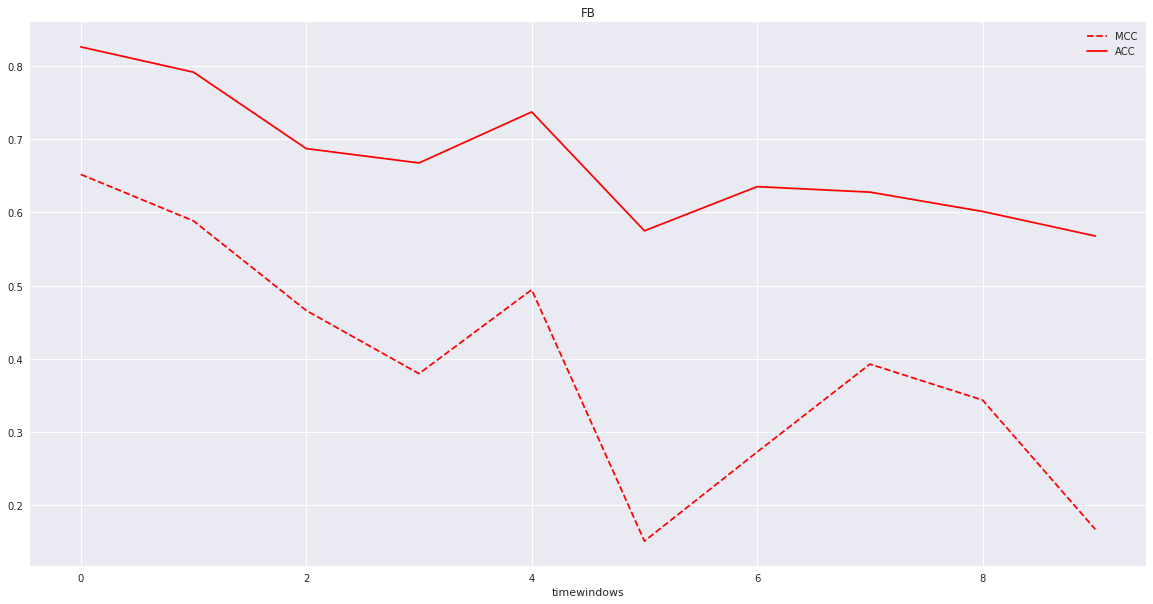




==================== INTC ==================== 



trend:  -48   0
....................................................................................................trend:  -35   0
....................................................................................................trend:  -28   0
....................................................................................................trend:  -7   0
....................................................................................................trend:  -1   0
....................................................................................................trend:  1   2
....................................................................................................trend:  1   8
....................................................................................................trend:  1   29
....................................................................................................trend:  1   36
..........

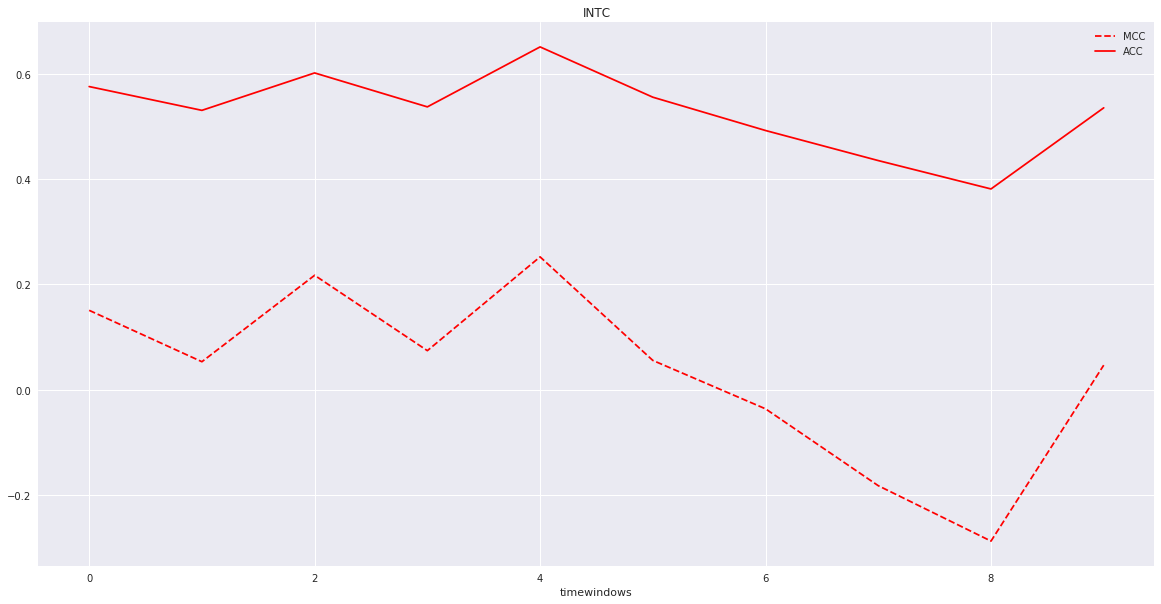




==================== CSCO ==================== 



trend:  -48   0
....................................................................................................trend:  -35   0
....................................................................................................trend:  -28   0
....................................................................................................trend:  -7   0
....................................................................................................trend:  -1   0
....................................................................................................trend:  1   2
....................................................................................................trend:  1   8
....................................................................................................trend:  1   29
....................................................................................................trend:  1   36
..........

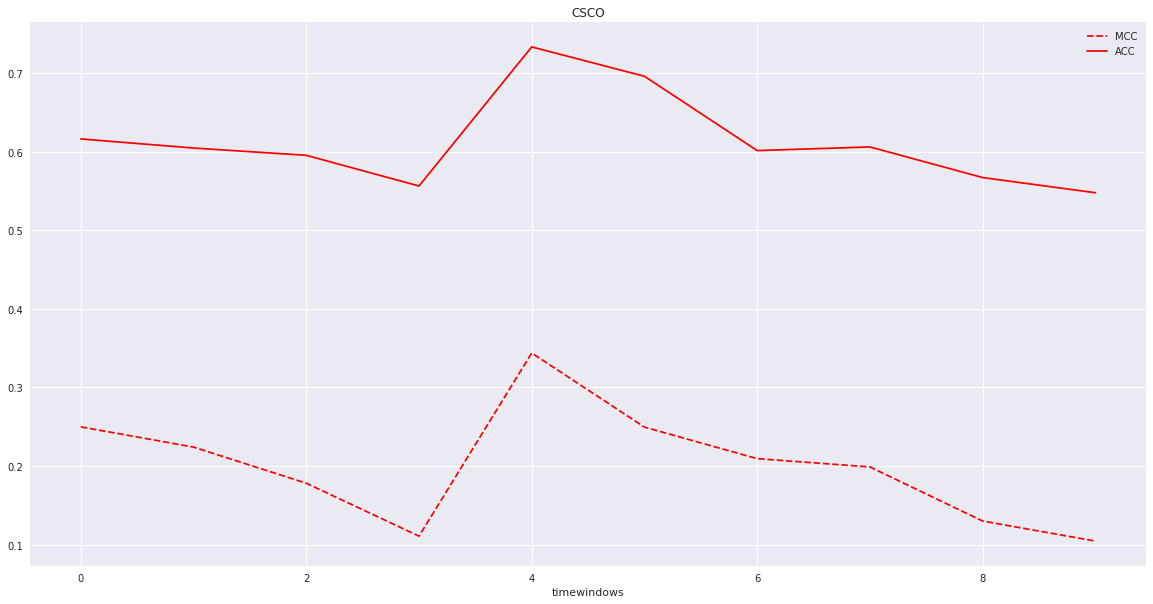




==================== CMCSA ==================== 



trend:  -48   0
....................................................................................................trend:  -35   0
....................................................................................................trend:  -28   0
....................................................................................................trend:  -7   0
....................................................................................................trend:  -1   0
....................................................................................................trend:  1   2
....................................................................................................trend:  1   8
....................................................................................................trend:  1   29
....................................................................................................trend:  1   36
.........

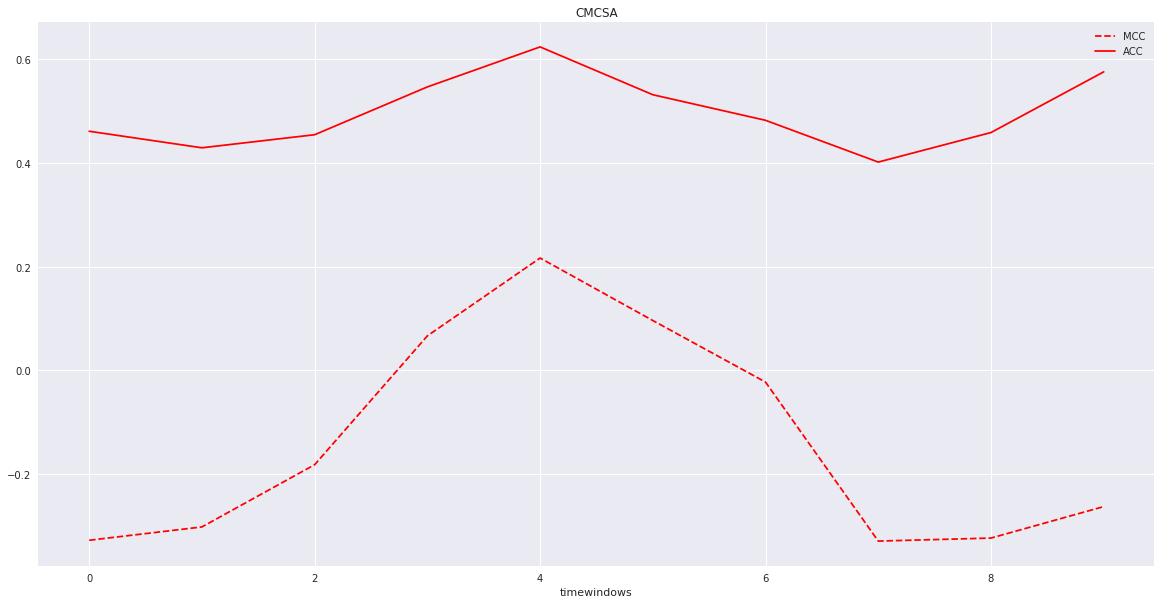




==================== NVDA ==================== 



trend:  -48   0
....................................................................................................trend:  -35   0
....................................................................................................trend:  -28   0
....................................................................................................trend:  -7   0
....................................................................................................trend:  -1   0
....................................................................................................trend:  1   2
....................................................................................................trend:  1   8
....................................................................................................trend:  1   29
....................................................................................................trend:  1   36
..........

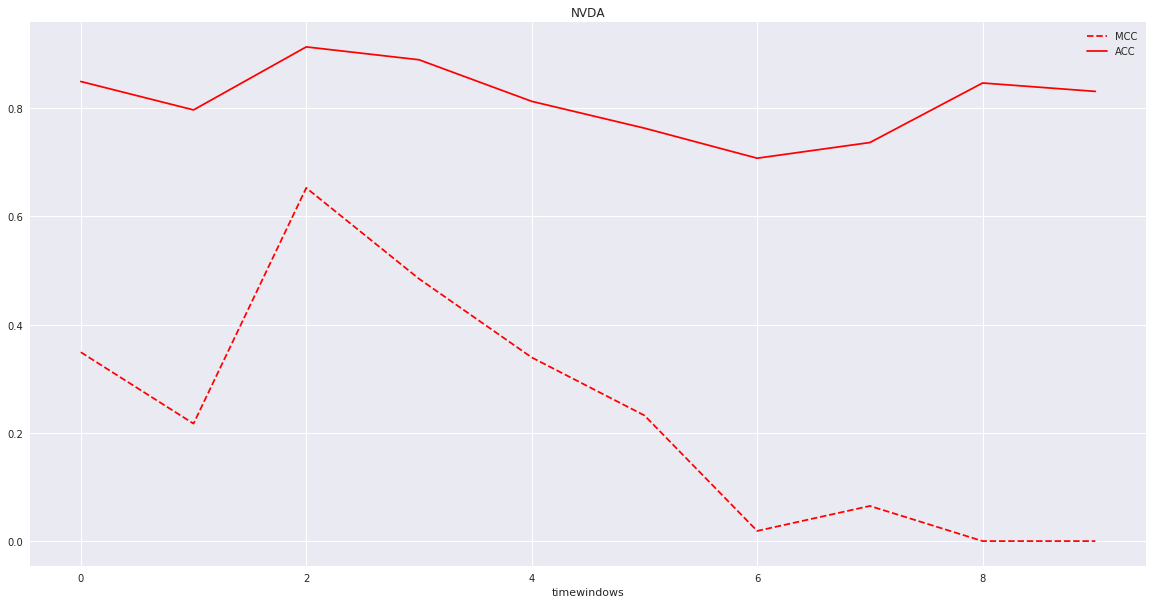




==================== NFLX ==================== 



trend:  -48   0
....................................................................................................trend:  -35   0
....................................................................................................trend:  -28   0
....................................................................................................trend:  -7   0
....................................................................................................trend:  -1   0
....................................................................................................trend:  1   2
....................................................................................................trend:  1   8
....................................................................................................trend:  1   29
....................................................................................................trend:  1   36
..........

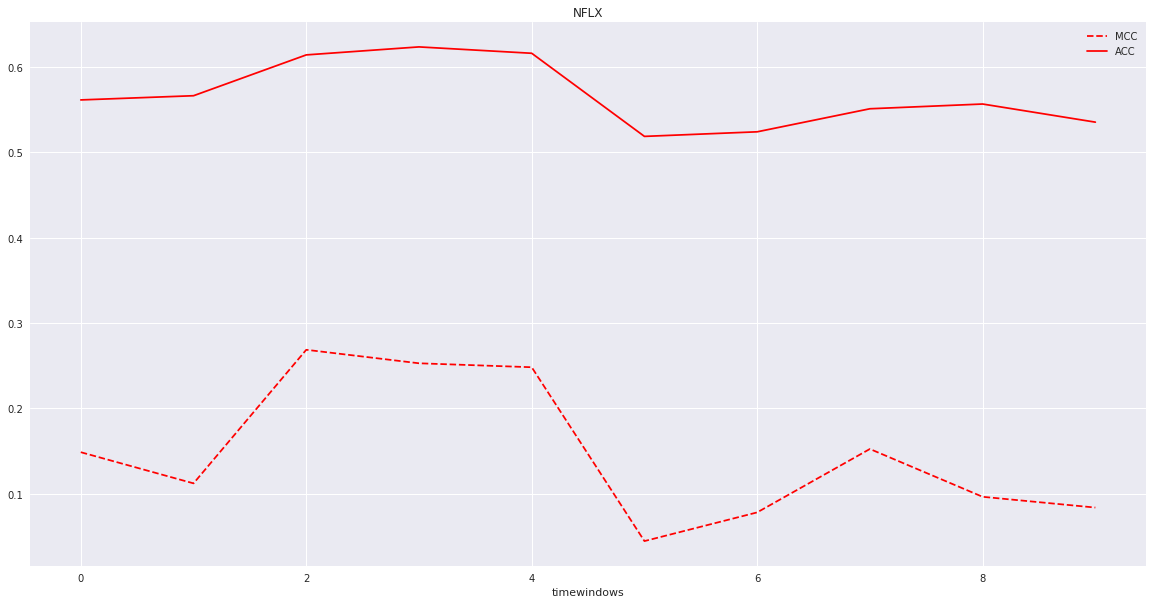

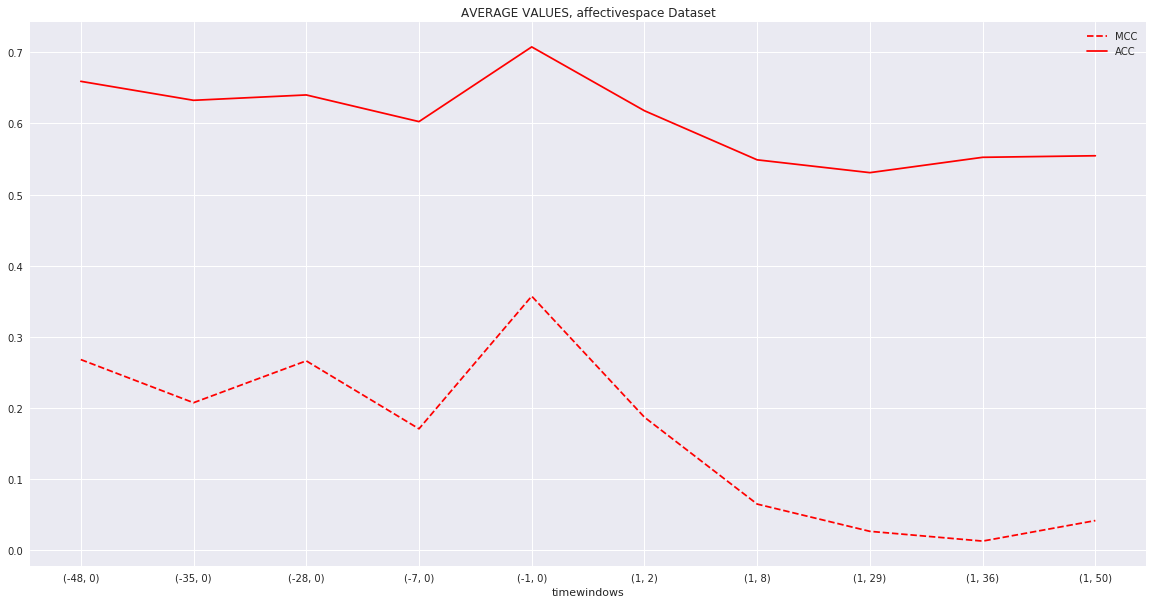

In [4]:
MCCs_avg = [0]*len(TREND_WINDOWs)
ACCs_avg = [0]*len(TREND_WINDOWs)

for ticker in tickers:
    print('\n\n\n==================== '+str(ticker)+' ==================== \n\n\n')

    MCCs = []
    ACCs = []
    ds = DatasetManager()
    ds.load_dataset(ticker = ticker, kind = kind_of_dataset)
    
    for (init, finish) in TREND_WINDOWs:
        print('trend: ',init,' ',finish)
        (x,y) = ds.get_dataset_for_trend(init, finish)

        #DATASET DIVISION:
        train=0.7
        nt=math.ceil(len(x)*train)
        x_tv = x[:nt]
        y_tv = y[:nt]
        x_test = x[nt:]
        y_test = y[nt:]
    
        best_mcc = -float(np.inf)
        best_c = 0
        best_g = 0
        for c in np.logspace(-3,4,10):
            for g in np.logspace(-3,4,10):
                print('.', end='')
                trainpoint=math.floor(len(x_tv)*0.50)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                #Cross validation
                cvMCC = 0
                num_cv = 0
                for i in range(0,4):
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    if(sum(y_val)==len(y_val) or sum(y_val)==0):                        
                        continue
                    svm_model = svm.SVC(kernel='rbf', C=c, gamma=g)
                    svm_model.fit(x_train,y_train)
                    y_pred = svm_model.predict(x_val)
                    confmatrix = confusion_matrix(y_val, y_pred)
                    tn, fp, fn, tp = confmatrix.ravel()
                    denom = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)
                    mcc = 0 if denom== 0 else (tp*tn -fp*fn)/sqrt(denom)
                    num_cv +=1
                    cvMCC += mcc
                cvMCC /= num_cv

                if(cvMCC > best_mcc):
                    best_mcc = cvMCC
                    best_c = c
                    best_g = g


        svm_model = svm.SVC(kernel='rbf', C=best_c, gamma=best_g)
        svm_model.fit(x_tv,y_tv)
        acc = svm_model.score(x_test,y_test)
        y_pred = svm_model.predict(x_test)
        confmatrix = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = confmatrix.ravel()
        denom = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)
        mcc = 0 if denom== 0 else (tp*tn -fp*fn)/sqrt(denom)
        ACCs.append(acc)
        MCCs.append(mcc)
        ACCs_avg[TREND_WINDOWs.index((init, finish))]+= acc/len(tickers)
        MCCs_avg[TREND_WINDOWs.index((init, finish))]+= mcc/len(tickers)

    plt.figure(figsize=(20,10))
    plt.plot(MCCs,'--r', label='MCC')
    plt.plot(ACCs,'r', label='ACC')
    plt.xlabel('timewindows')
    plt.title(ticker)
    plt.legend()
    plt.show() 

plt.figure(figsize=(20,10))
plt.plot(MCCs_avg,'--r', label='MCC')
plt.plot(ACCs_avg,'r', label='ACC')
plt.xlabel('timewindows')
plt.xticks(range(0,len(TREND_WINDOWs)), TREND_WINDOWs)
plt.title('AVERAGE VALUES, '+str(kind_of_dataset)+' Dataset')
plt.legend()
plt.show() 

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(MCCs_avg,'--r', label='MCC')
plt.plot(ACCs_avg,'r', label='ACC')
plt.xlabel('timewindows')
plt.xticks(range(0,len(TREND_WINDOWs)), TREND_WINDOWs)
plt.title('AVERAGE VALUES, '+str(kind_of_dataset)+' dataset')
plt.legend()
plt.show() 

